## E&M: Standards Poisson 1 & 2

V at bottom plate (z=-1.2857142857142858): 0.714 V
V at top plate (z=1.2857142857142856): 9.286 V

There is a slight error in potential values at the top and bottom plates. 
I believe this is due to the error in indexing as you can see that the z positions are also slightly off.


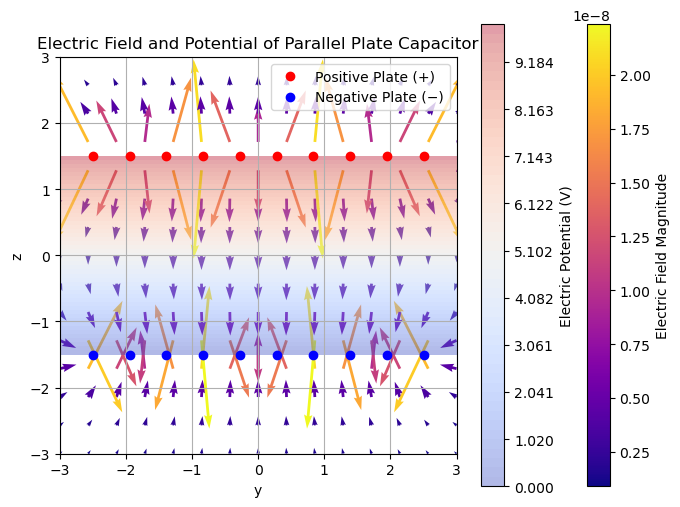

In [79]:
 import numpy as np
import matplotlib.pyplot as plt

# constant & parameters
k = 9.0E9 # rounded columbs constant
plate_len = 5 
plate_sep = 3 
num_charge = 10
q = 1.0E-19 # mag charge for each point 
x_fixed = 0.0 

# plate charge location
y_plate = np.linspace(-plate_len / 2, plate_len / 2, num_charge)

# plate 1 (top, +q)
charge_top = [(x_fixed, y, plate_sep / 2, +q) for y in y_plate]

# plate 2 (bottom, -q)
charge_bot = [(x_fixed, y,  -plate_sep / 2, -q) for y in y_plate]

# combine charges
charges = charge_top + charge_bot

# grid for electric field vector
y_vals = np.linspace(-3, 3, 15)
z_vals = np.linspace(-3, 3, 15)
Y, Z = np.meshgrid(y_vals, z_vals)

# initialize field components
Ey = np.zeros_like(Y)
Ez = np.zeros_like(Z)

# function to compute electric field from a point charge
def E_field_yz(q, xq, yq, zq, y, z):
    dx = x_fixed - xq
    dy = y - yq
    dz = z - zq
    r_squared = dx**2 + dy**2 + dz**2 + 1e-10  # small term to prevent division by zero
    r = np.sqrt(r_squared)
    E_mag = k * q / r_squared  # magnitude 
    return E_mag * dy / r, E_mag * dz / r  # components

# sum fields from all point charges
for xq, yq, zq, q in charges:
    dEy, dEz = E_field_yz(q, xq, yq, zq, Y, Z)
    #print("dEy: ", dEy, "\ndEz:", dEz)
    #die_in = (Z >= -die_z) & (Z <= die_z) # apply dielectric effect only in the material
    #Ey += np.where(die_in, dEy / epsilon, dEy)
    #Ez += np.where(die_in, dEz / epsilon, dEz)
    Ey += dEy
    Ez += dEz
    
# compute E_mag again with componets for quiver
E_mag_quiver = np.sqrt(Ey**2 + Ez**2) 


# calculate electric potential with boundary conditions V=V0 at 
V0 = 10  # chosen initial potential value, volts

z_top = +plate_sep / 2
z_bot = -plate_sep / 2

V_potential = (V0 / (z_top - z_bot)) * (Z - z_bot)

# mask potential outside the plate region
V_potential = np.where((Z >= z_bot - 1) & (Z <= z_top + 1 ), V_potential, np.nan)

# index where z = z_bot and z = z_top to check potential values
i_bot = np.argmin(np.abs(z_vals - z_bot))
i_top = np.argmin(np.abs(z_vals - z_top))
j_center = len(y_vals) // 2

print(f"V at bottom plate (z={z_vals[i_bot]}): {V_potential[i_bot, j_center]:.3f} V")
print(f"V at top plate (z={z_vals[i_top]}): {V_potential[i_top, j_center]:.3f} V")
print("\nThere is a slight error in potential values at the top and bottom plates. \nI believe this is due to the error in indexing as you can see that the z positions are also slightly off.")


# setup plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot( y_plate , [plate_sep / 2] * num_charge, 'ro', label='Positive Plate (+)') # draw top plate 
ax.plot( y_plate, [-plate_sep / 2] * num_charge, 'bo', label='Negative Plate (−)') # draw bottom plate
quiver = ax.quiver(Y, Z, Ey, Ez, E_mag_quiver, cmap='plasma', scale=1E-7, width=0.007)
cbar = fig.colorbar(quiver, ax=ax)
cbar.set_label('Electric Field Magnitude')
contour = ax.contourf(Y, Z, V_potential, levels=np.linspace(0, V0, 50) , cmap='coolwarm', alpha=0.4)
cbar1 = fig.colorbar(contour, ax=ax, label='Electric Potential (V)')
#plt.axhline(z_top, color='g', ls='--', label='Bottom Plate')
#plt.axhline(z_bot, color='purple', ls='--', label='Top Plate')
ax.set_title("Electric Field and Potential of Parallel Plate Capacitor")
ax.set_xlabel("y")
ax.set_ylabel("z")
ax.set_aspect('equal')
ax.legend()
plt.grid(True)
plt.show()

